# **1. Введение**

✍ В этом модуле мы продолжим изучение библиотеки Pandas и рассмотрим более сложные методы работы с данными, которые помогают производить их анализ и подготовку. Модуль можно условно разделить на две части:

в первой части мы поговорим о продвинутых методах Pandas, позволяющих производить более детальный анализ зависимостей в данных и делать на их основе выводы;
вторая часть посвящена работе с несколькими таблицами и их объединению.
Как мы уже говорили, этап подготовки данных играет важную роль в Data Science. Однако этот этап не пройдёт успешно без тщательного анализа зависимостей в данных. Для успешного преобразования таблицы вам необходимо иметь представление о том, как признаки связаны между собой и с целевым признаком, который вы хотели бы предсказать. Поэтому в первой части модуля мы рассмотрим основные инструменты, позволяющие производить такой анализ, а также методы сортировки данных.

Другая проблема заключается в том, что ваши данные не всегда могут быть представлены в виде одной таблицы. Такое нередко случается при работе с выгрузками из целой базы данных. Например, к вам в руки могут попасть несколько таблиц с информацией о клиентах, об их заказах и о поставщиках. Однако вашей целью может быть анализ данных о поставках в целом при использовании всей предоставленной информации. В таком случае таблицы необходимо объединить в единую структуру — об этом мы и поговорим во второй части модуля.

**Цели данного модуля:**

Научиться сортировать данные.
Получить навыки группировки данных и анализа групп.
Освоить методы построения сводных таблиц и научиться с их помощью исследовать зависимости в признаках.
Научиться работать с данными, представленными в виде нескольких таблиц, и познакомиться с методами их объединения.



ВСПОМНИМ, С КАКИМИ ДАННЫМИ МЫ РАБОТАЕМ

В этом модуле мы продолжим нашу работу с датасетом о продажах объектов недвижимости в Мельбурне и его пригородах. Информацию об исходных данных вы можете найти здесь.

В прошлом модуле мы совершили множество преобразований над нашей таблицей — давайте вспомним их:

удалили столбцы index и Coordinates;
создали признак средней площади одной комнаты MeanRoomsSquare и ввели коэффициент соотношения площади здания к площади участка — AreaRatio;
преобразовали признак даты продажи Date в формат datetime и создали на его основе следующие столбцы: номер месяц продажи (MonthSale), номер дня недели продажи (WeekdaySale), «признак-мигалку» выходного дня (Weekend);
заменили признак года постройки здания YearBuilt на его возраст AgeBuilding;
извлекли из признака адреса объекта Address новый признак подтипа улицы StreetType и удалили столбец с адресом;
уменьшили число уникальных наименований агентств по недвижимости (SellerG), а также число пригородов (Suburb);
выделили категориальные признаки и преобразовали их в тип данных сategory;
заменили сокращённые названия категорий признака типа объекта Type на их полные названия (h — house, t —  townhouse, u — unit).

Прочитаем датасет и выведем первые пять его строк:

In [ ]:
import pandas as pd

melb_df = pd.read_csv('data/melb_data_fe.csv')
melb_df.head()

![первые пять его строк.png](<attachment:первые пять его строк.png>)
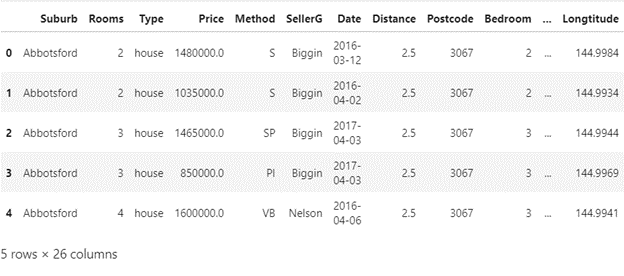

Файл подгрузился верно, однако есть один нюанс. Давайте посмотрим на информацию о столбцах с помощью метода info():

In [ ]:
display(melb_df.info())

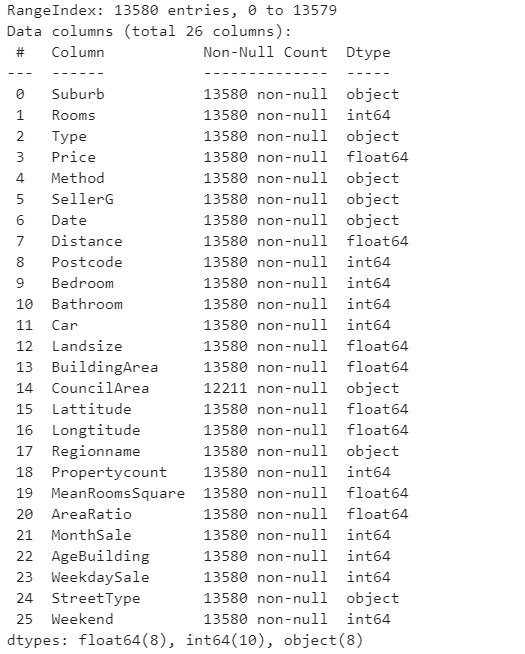

Обратите внимание, что наше преобразование столбцов к типам datetime и category «слетело».

*Почему это произошло?*

Ответ на самом деле очень прост: csv-файл не хранит в себе информацию о типах данных столбцов, поэтому при чтении Pandas автоматически определяет тип данных столбца. Не забывайте об этом, обмениваясь преобразованными данными с вашими коллегами.

А пока предлагаем вам самим совершить преобразование столбцов к нужным типам данных ↓

*Задание 1.1*

Преобразуйте столбец Date в формат datetime и выделите квартал (quarter) продажи объектов недвижимости. Найдите второй по популярности квартал продажи. В качестве ответа запишите число объектов, проданных в этом квартале.

*Подсказка* (1 из 3): Чтобы преобразовать дату в формат datetime, используйте функцию pd.to_datetime().

*Подсказка* (2 из 3): С помощью атрибута акссесора dt quarter выделите квартал, а с помощью метода value_counts() посчитайте частоту для каждого из кварталов.

*Подсказка* (3 из 3): Чтобы найти число зданий, проданных во втором по популярности квартале, можно воспользоваться iloc.

(4359)

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [6]:
melb_data = pd.read_csv('data/melb_data_fe.csv')
melb_df = melb_data.copy()
melb_df['Date'] = pd.to_datetime(melb_df['Date'])
quarters = melb_df['Date'].dt.quarter
print(quarters.value_counts().iloc[1])

4359


*Задание 1.2*

Преобразуйте все столбцы, в которых меньше 150 уникальных значений, в тип данных category, исключив из преобразования столбцы Date, Rooms, Bedroom, Bathroom, Car.
В качестве ответа запишите результирующее количество столбцов, которые имеют тип данных category.

Подсказка (1 из 1): Число столбцов, имеющих тип category, можно узнать с помощью метода info().

In [7]:
melb_data = pd.read_csv('data/melb_data_fe.csv')
melb_df = melb_data.copy()
melb_df['Date'] = pd.to_datetime(melb_df['Date'])
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] 
max_unique_count = 150 
for col in melb_df.columns: 
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: 
        melb_df[col] = melb_df[col].astype('category')
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None